In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import risk_management_utils as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import quandl
import numpy as np
import pandas as pd
quandl.ApiConfig.api_key="uitSwzyGWCxD8Nt2pZGF"

In [39]:
af=quandl.get("BSE/BOM500440") ## hindalco
bf=quandl.get("BSE/BOM500400") ## tata power
cf=erk.get_data("BSE/BOM532215")## axis bank
df=erk.get_data("BSE/BOM500112")## SBI
ef=erk.get_data("BSE/BOM532281")## HCL

df

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1995-05-05,177.00,178.0,174.00,175.00,0.00,0.0,0.0,0.0,NaN,NaN,4.00,-2.00
1995-05-08,172.00,174.0,172.00,172.00,0.00,0.0,0.0,0.0,NaN,NaN,2.00,0.00
1995-05-09,174.00,174.0,170.00,172.00,0.00,0.0,0.0,0.0,NaN,NaN,4.00,-2.00
1995-05-10,171.00,172.0,170.00,171.00,0.00,0.0,0.0,0.0,NaN,NaN,2.00,0.00
1995-05-12,169.00,171.0,167.00,171.00,0.00,0.0,0.0,0.0,NaN,NaN,4.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-18,596.85,597.1,587.85,591.40,591.34,322537.0,10380.0,190729606.0,101724.0,31.54,9.25,-5.45
2023-01-19,591.50,591.5,587.80,589.90,589.47,168181.0,5206.0,99138403.0,63026.0,37.48,3.70,-1.60
2023-01-20,592.00,596.5,590.50,592.10,594.22,259570.0,8517.0,154242333.0,134805.0,51.93,6.00,0.10


In [40]:
af.rename(columns={"Close":"Hindalco"},inplace=True)
bf.rename(columns={"Close":"Tata Power"},inplace=True)
cf.rename(columns={"Close":"Axis Bank"},inplace=True)
df.rename(columns={"Close":"SBI"},inplace=True)
ef.rename(columns={"Close":"HCL"},inplace=True)


In [43]:
af_1=af["Hindalco"]
# df_1.index=df_1.index.to_period("M")
bf_1=bf["Tata Power"]
cf_1=cf["Axis Bank"]
df_1=sf["SBI"]
ef_1=hf["HCL"]

In [46]:
retur=pd.concat([af_1,bf_1,cf_1,df_1,ef_1],axis=1,
                  names={"Hindalco","Tata Power","Axis Bank","SBI","HCL"})
returns=erk.compute_daily_return(retur)
retur.to_csv("holdings.csv")
returns.dropna()
ret=returns[7443:]
ret.shape

(336, 5)

In [47]:
ret

,Hindalco,Tata Power,Axis Bank,SBI,HCL
Date,,,,,
2021-09-22,0.026383,0.014354,-0.008489,0.000114,0.012933
2021-09-23,0.042985,0.042453,0.030378,0.024601,0.009234
2021-09-24,-0.009216,-0.031674,-0.017419,-0.020009,0.022365
2021-09-27,0.005853,-0.002516,-0.002067,0.012250,-0.045778
2021-09-28,-0.006131,0.009369,-0.009541,-0.002465,-0.020301
...,...,...,...,...,...
2023-01-19,-0.007355,-0.010366,0.004707,-0.002536,-0.002424
2023-01-20,-0.018824,0.009257,0.002423,0.003729,-0.003239
2023-01-23,0.007450,-0.000724,0.002847,0.014102,0.012097


In [49]:
retur[7443:].head()

,Hindalco,Tata Power,Axis Bank,SBI,HCL
Date,,,,,
2021-09-22,462.95,137.80,788.40,439.0,1315.80
2021-09-23,482.85,143.65,812.35,449.8,1327.95
2021-09-24,478.40,139.10,798.20,440.8,1357.65
2021-09-27,481.20,138.75,796.55,446.2,1295.50
2021-09-28,478.25,140.05,788.95,445.1,1269.20


In [53]:
## standard deviation of respective returns gives daily percent return, taking 7443 index onwards to keep relevant period of time under consideration 
erk.daily_vol(ret) ## daily volatility (σp)

Hindalco      0.025701
Tata Power    0.026783
Axis Bank     0.017750
SBI           0.016449
HCL           0.016239
dtype: float64

In [54]:
erk.annual_vol(ret)

Hindalco      0.407985
Tata Power    0.425170
Axis Bank     0.281772
SBI           0.261112
HCL           0.257793
dtype: float64

In [55]:
erk.monthly_vol(ret)

Hindalco      0.117775
Tata Power    0.122736
Axis Bank     0.081341
SBI           0.075377
HCL           0.074419
dtype: float64

<AxesSubplot:xlabel='Date'>

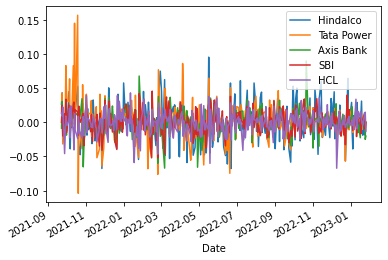

In [56]:
ret.plot.line()

In [57]:
erk.annual_ret(ret),erk.annual_vol(ret)

(Hindalco      0.054712
 Tata Power    0.365244
 Axis Bank     0.089751
 SBI           0.255222
 HCL          -0.103413
 dtype: float64,
 Hindalco      0.407985
 Tata Power    0.425170
 Axis Bank     0.281772
 SBI           0.261112
 HCL           0.257793
 dtype: float64)

In [63]:
erk.annual_ret(ret)/erk.annual_vol(ret)

Hindalco      0.134102
Tata Power    0.859053
Axis Bank     0.318523
SBI           0.977442
HCL          -0.401147
dtype: float64

In [66]:
sharpe_ratio=erk.sharpe_ratio(ret)

In [67]:
sharpe_ratio

Hindalco      0.060570
Tata Power    0.788493
Axis Bank     0.212054
SBI           0.862548
HCL          -0.517519
dtype: float64

## Efficient frontier

In [68]:
cov=ret.cov()

In [69]:
cov

,Hindalco,Tata Power,Axis Bank,SBI,HCL
Hindalco,0.000661,0.000311,0.000136,0.000167,0.000155
Tata Power,0.000311,0.000717,0.000153,0.000215,0.000114
Axis Bank,0.000136,0.000153,0.000315,0.000179,0.000065
SBI,0.000167,0.000215,0.000179,0.000271,0.000066
HCL,0.000155,0.000114,0.000065,0.000066,0.000264


In [70]:
er=erk.annual_ret(ret)

In [73]:
erk.portfolio_vol(np.repeat(1/5,5),cov)
erk.portfolio_return(np.repeat(1/5,5),erk.annual_ret(ret))

0.13230296506290662

### 2 asset frontier

In [74]:
l=["Hindalco","Axis Bank"]
n_points=50
weights=[np.array([w,1-w]) for w in np.linspace(0,1,n_points)]

<AxesSubplot:xlabel='risk', ylabel='returns'>

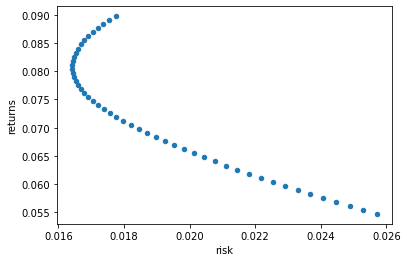

In [75]:
erk.plot_ef2(50,er[l],cov.loc[l,l])

### N-Asset Frontier

<AxesSubplot:xlabel='Volatility'>

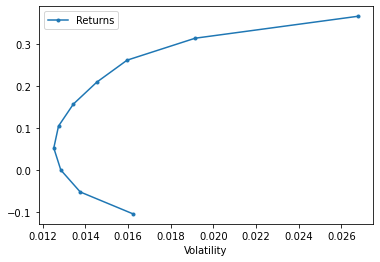

In [76]:
erk.plot_ef(10,er,cov)

In [77]:
i=4
print('best weightage to invest for 50000 are ',erk.optimal_weights(10,er,cov)[i]*50000)
print('volatility is {} %'.format(100*erk.portfolio_vol(erk.optimal_weights(10,er,cov)[i],cov)))
print('return is {} %'.format(100*erk.portfolio_return(erk.optimal_weights(10,er,cov)[i],er)))

best weightage to invest for 50000 are  [    0.          2022.98252447  8835.97322637 21636.82793826
 17504.21631091]
volatility is 1.2743346918896932 %
return is 10.487884531184454 %


### Finding max sharpe ratio portfolio

<AxesSubplot:xlabel='Volatility'>

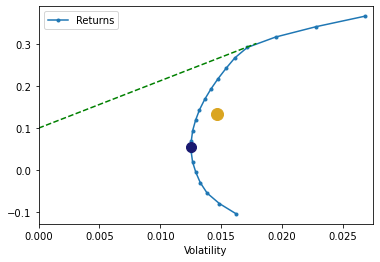

In [80]:
erk.plot_ef(20,er,cov,show_cml=True,rf=0.1,show_ew=True,show_gmv=True)

In [81]:
w_msr=erk.msr(0.6,er,cov)*50000
r_msr=erk.portfolio_return(w_msr,er)
v_msr=erk.portfolio_vol(w_msr,cov)

In [90]:
erk.portfolio_vol(w,cov)

0.015501118047960845

In [91]:
list={
'Hindalco':w_msr[0],
    'Tata Power':w_msr[1],
    'Axis Bank':w_msr[2], 
    'SBI':w_msr[3],
    'HCl':w_msr[4]}

In [92]:
list

{'Hindalco': 0.0,
 'Tata Power': 49999.99999976585,
 'Axis Bank': 7.279177260954839e-08,
 'SBI': 0.0,
 'HCl': 2.2129520438340933e-07}

In [84]:
10064-2623


7441